In [2]:
import requests
import pandas as pd
import json
import numpy as np
req=requests.get("https://api.covid19api.com/live/country/united-states").json()
covid=pd.DataFrame(req)

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           5837 non-null   object
 1   Country      5837 non-null   object
 2   CountryCode  5837 non-null   object
 3   Province     5837 non-null   object
 4   City         5837 non-null   object
 5   CityCode     5837 non-null   object
 6   Lat          5837 non-null   object
 7   Lon          5837 non-null   object
 8   Confirmed    5837 non-null   int64 
 9   Deaths       5837 non-null   int64 
 10  Recovered    5837 non-null   int64 
 11  Active       5837 non-null   int64 
 12  Date         5837 non-null   object
dtypes: int64(4), object(9)
memory usage: 592.9+ KB


In [4]:
covid.describe()

Confirmed        Deaths  Recovered        Active
count  5.837000e+03   5837.000000     5837.0  5.837000e+03
mean   6.842375e+05  11557.187596        0.0  6.726803e+05
std    8.335417e+05  14427.804181        0.0  8.195615e+05
min    0.000000e+00      0.000000        0.0  0.000000e+00
25%    1.400090e+05   2074.000000        0.0  1.376230e+05
50%    4.613520e+05   7255.000000        0.0  4.530770e+05
75%    8.339680e+05  13921.000000        0.0  8.218580e+05
max    4.770442e+06  69962.000000        0.0  4.700480e+06

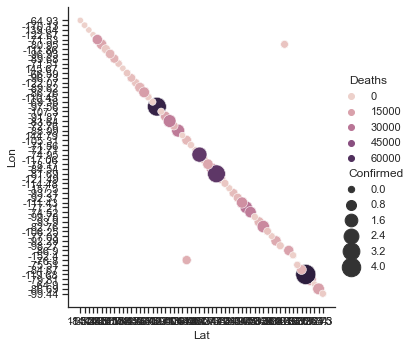

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.relplot(data=covid,x="Lat",y="Lon",hue="Deaths",size="Confirmed",sizes=(40,400))

In [7]:
covid['Lat'][0]

'18.35'

In [8]:
covid['Lat'] = covid['Lat'].astype('float16')
covid['Lon'] = covid['Lon'].astype('float16')

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5837 non-null   object 
 1   Country      5837 non-null   object 
 2   CountryCode  5837 non-null   object 
 3   Province     5837 non-null   object 
 4   City         5837 non-null   object 
 5   CityCode     5837 non-null   object 
 6   Lat          5837 non-null   float16
 7   Lon          5837 non-null   float16
 8   Confirmed    5837 non-null   int64  
 9   Deaths       5837 non-null   int64  
 10  Recovered    5837 non-null   int64  
 11  Active       5837 non-null   int64  
 12  Date         5837 non-null   object 
dtypes: float16(2), int64(4), object(7)
memory usage: 524.5+ KB


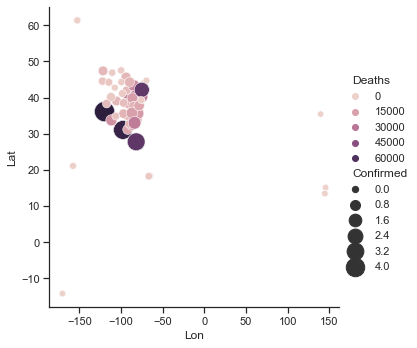

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.relplot(data=covid,x="Lon",y="Lat",hue="Deaths",size="Confirmed",sizes=(40,400))

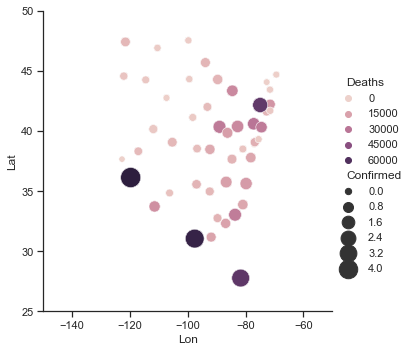

In [14]:
figs=sns.relplot(data=covid,x="Lon",y="Lat", hue="Deaths", size="Confirmed",sizes=(40,400)).set(ylim=(25,50),xlim=(-150,-50))

In [16]:
req=requests.get("https://www.communitybenefitinsight.org/api/get_hospitals.php").json()
hospitals=pd.DataFrame(req)
hospitals.head()

hospital_id hospital_org_id        ein                           name name2  \
0           1               1  630307951       Mizell Memorial Hospital         
1           2               2  630578923               St Vincents East         
2           3               3  630312913  Shelby Baptist Medical Center         
3           4               4  630459034   Callahan Eye Foundation Hosp         
4           5               5  581973570        Cherokee Medical Center         

                           name3              street_address        city  \
0       Mizell Memorial Hospital             702 Main Street         Opp   
1               St Vincents East  50 Medical Park Drive East  Birmingham   
2  Shelby Baptist Medical Center     1000 First Street North   Alabaster   
3   Callahan Eye Foundation Hosp   1720 University Boulevard  Birmingham   
4        Cherokee Medical Center         100 Northwood Drive      Centre   

  state zip_code  ... fips_state_and_county_code hospital_bed_count  \
0    AL    36462  ...                      01039                 99   
1    AL    35235  ...                      01073                362   
2    AL    35007  ...                      01117                252   
3    AL    35233  ...                      01073                106   
4    AL    35960  ...                      01019                 60   

  chrch_affl_f urban_location_f children_hospital_f memb_counc_teach_hosps_f  \
0            N                N                   N                        N   
1            N                Y                   N                        Y   
2            N                Y                   N                        N   
3            N                Y                   N                        Y   
4            N                N                   N                        N   

  medicare_provider_number            county hospital_bed_size  \
0                   010007  Covington County         <100 beds   
1                   010011  Jefferson County         >299 beds   
2                   010016     Shelby County      100-299 beds   
3                   010018  Jefferson County      100-299 beds   
4                   010022   Cherokee County         <100 beds   

        updated_dt  
0  October 1, 2021  
1  October 1, 2021  
2  October 1, 2021  
3  October 1, 2021  
4  October 1, 2021  

[5 rows x 21 columns]

In [39]:
hospitals['state_county']=hospitals['state']+'_'+hospitals['county']
hospitals.head()

hospital_id hospital_org_id        ein                           name name2  \
0           1               1  630307951       Mizell Memorial Hospital         
1           2               2  630578923               St Vincents East         
2           3               3  630312913  Shelby Baptist Medical Center         
3           4               4  630459034   Callahan Eye Foundation Hosp         
4           5               5  581973570        Cherokee Medical Center         

                           name3              street_address        city  \
0       Mizell Memorial Hospital             702 Main Street         Opp   
1               St Vincents East  50 Medical Park Drive East  Birmingham   
2  Shelby Baptist Medical Center     1000 First Street North   Alabaster   
3   Callahan Eye Foundation Hosp   1720 University Boulevard  Birmingham   
4        Cherokee Medical Center         100 Northwood Drive      Centre   

  state zip_code  ... hospital_bed_count chrch_affl_f urban_location_f  \
0    AL    36462  ...                 99            N                N   
1    AL    35235  ...                362            N                Y   
2    AL    35007  ...                252            N                Y   
3    AL    35233  ...                106            N                Y   
4    AL    35960  ...                 60            N                N   

  children_hospital_f memb_counc_teach_hosps_f medicare_provider_number  \
0                   N                        N                   010007   
1                   N                        Y                   010011   
2                   N                        N                   010016   
3                   N                        Y                   010018   
4                   N                        N                   010022   

             county hospital_bed_size       updated_dt         state_county  
0  Covington County         <100 beds  October 1, 2021  AL_Covington County  
1  Jefferson County         >299 beds  October 1, 2021  AL_Jefferson County  
2     Shelby County      100-299 beds  October 1, 2021     AL_Shelby County  
3  Jefferson County      100-299 beds  October 1, 2021  AL_Jefferson County  
4   Cherokee County         <100 beds  October 1, 2021   AL_Cherokee County  

[5 rows x 22 columns]

In [41]:
HospitalInfoPerCounty=hospitals.groupby(['state_county'], as_index=False)['hospital_bed_count'].sum()
HospitalInfoPerCounty
#hospitals['hospital_bed_count'].agg(sum)

state_county
0           AK_Anchorage Municipality
1     AK_Fairbanks North Star Borough
2          AK_Kenai Peninsula Borough
3        AK_Ketchikan Gateway Borough
4            AK_Kodiak Island Borough
...                               ...
1705            WY_Hot Springs County
1706                WY_Natrona County
1707                   WY_Park County
1708                 WY_Platte County
1709               WY_Washakie County

[1710 rows x 1 columns]

In [ ]:
covid['Lat'] = covid['Lat'].astype('float16')
covid['Lon'] = covid['Lon'].astype('float16')